#**Voter Registration: Midterm Project**
Student: Jessica Wong

Links: [GitHub](https://github.com/jwong117-cmyk/325-Midterm.git) | [Article](https://fivethirtyeight.com/features/voter-registrations-are-way-way-down-during-the-pandemic/) | [DataFrame](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv)

# Introduction

This notebook contians data from the story in the article linked above, demonstrating the differences in new voter registrations in early 2016 (pre-pandemic) and in early 2020 (pandemic) across 12 states. Using this data, I will investigate the formation of voter registration in the U.S and illustrate the national and state trends of voter registration rates across time. As a citizen of the United States, voting has a significant role in our democracry and politics. As a new generation of people become young adults and eligible to vote, it is important to determine the causes behind the drop in register quantities and find solutions to mitigate it. This notebook serves as a tool for increasing awareness amoung the younger generation. My research questions are:
1. In the United States, how does new voter registration in 2016 compare to voter registration in 2020?
2. How does new voter registration in Western States differ to Eastern States during the height of COVID-19 (2020) - specifically in California and Florida?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# Set-Up
To begin, let's look at the first five rows of the dataset and determine which variables we are working with.

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


There are four variables.
1. "Jurisdiction", a nominal categorical variable, describes the state where the data is being collected.
2. "Year" is a variable that labels either 2016 or 2020, the time period where voter registration numbers are being compared. It is neither a categorical or numerical variable.
3. "Month" is also a time-specific variable, categorizing data from January through April of each of the 12 jurisdictions and for 2016 and 2020.
4. "New Registered Voters" is a numerical discrete variable that describes the count of new registered voters in that jurisdiction, month and year.

Next, we check our data types and any null/missing data.

In [4]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
voters.isna().values.any()

False

*There is no missing/null data. We have 2 types of data we're working with: int64 (integers) and object.*

To make our columns easier to use, we'll rename "Jurisdiction" to "NAME" and "New registered voters" to "registered_voters" for use throughout the book.

In [6]:
voters=voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})

In [7]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

***Potential Limitations of Our Data***

The potential limitations to this data is the lack of geographical data of other states on voter registration. The United States has 50 states, but with data only on 12 of these states, there is a limited sample that can affect how accurate this data will represent the trends across the U.S. In addition, the lack of data on other categorical variables (including age, gender, and educational background) limit the way this data can be interpreted. With only the number of new registered voters, readers can only be informed of the changes in quantity across time; they cannot make inferences or draw conclusions on why/how these changes may occur and how to mitigate it.

# Exploratory Data Analysis

In order to explore our data in more detailed ways, we will look into the average and maximum voter registrations all across and per state.

*The highest amount of new voter registrations is 238,281, in California of Feburary 2020.*

In [8]:
voters.registered_voters.max()

238281

In [9]:
voters.loc[voters.registered_voters == voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


*The average voter registrations across the board (2016 and 2020, in all sample states) is 48,223 people*

In [10]:
voters["registered_voters"].mean()

48223.46226415094

*Each of the states that went above the national average for new voter registration were more than at least 1 time. In total, 36 times did states exceed the national average. Listed below:*
* Arizona: 3 times
* California: 7 times
* Florida: 7 times
* Georgia: 1 time
* Illinois: 4 times
* North Carolina: 6 times
* Texas: 8 times

To find this, I created a new dataframe, named "high_voters".

In [13]:
high_voters = voters.loc[(voters['registered_voters'] > 48223)]
print(high_voters)

              NAME  Year Month  registered_voters
1          Arizona  2016   Feb              51155
2          Arizona  2016   Mar              48614
5          Arizona  2020   Feb              50853
8       California  2016   Jan              87574
9       California  2016   Feb             103377
10      California  2016   Mar             174278
11      California  2016   Apr             185478
12      California  2020   Jan             151595
13      California  2020   Feb             238281
14      California  2020   Mar             176810
42         Florida  2016   Jan              50231
43         Florida  2016   Feb              87351
44         Florida  2016   Mar              73627
45         Florida  2016   Apr              52508
46         Florida  2020   Jan              77466
47         Florida  2020   Feb             109859
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
59        Illinois  2016   Feb              99674


In [14]:
high_voters.groupby("NAME")["registered_voters"].count()

,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


*The three states with the highest average voter registration overall was California, Texas and Florida.*

To find this, I found the average registration of each state using the `.groupby` function. Then, I found the highest_average using the `.sort_values` function.

In [15]:
avg_reg = voters.groupby("NAME")["registered_voters"].mean()
print(avg_reg)

NAME
Arizona                  35311.500
California              144545.375
Colorado                 20527.500
Delaware                  3166.375
District of Columbia      3248.400
Florida                  65868.125
Georgia                  36604.125
Illinois                 56840.375
Maryland                 22133.500
North Carolina           56040.800
Texas                   114610.100
Virginia                 24845.200
Name: registered_voters, dtype: float64


In [16]:
highest_average = avg_reg.sort_values(ascending=False).head(3)
print(highest_average)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


# Data Visualization

To demonstrate this data on plots, we can visualize trends we see throughout states and through the years.

**Voter Registration by State**

I created a dataframe labeled "total", whcih would be used in our plot instead of "voters". It would combine all the quantities every month of every year, per state and give a total number of voter registration per state.

In [17]:
total = voters.groupby("NAME")["registered_voters"].sum()
total_new = total.reset_index()

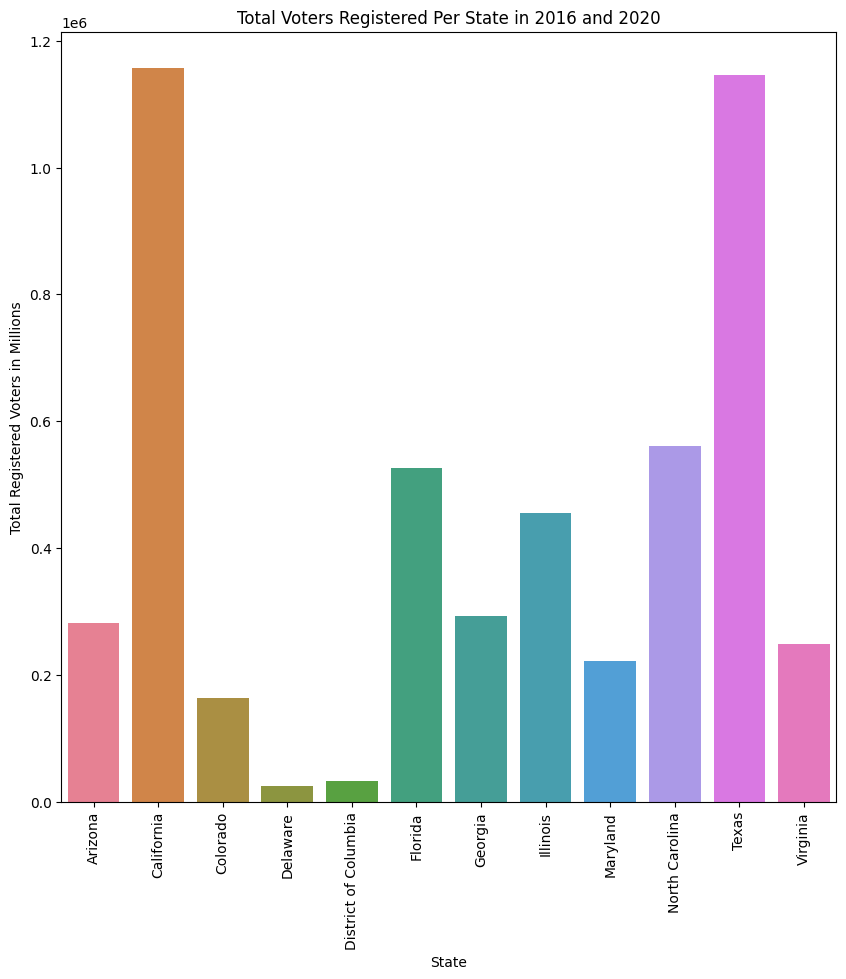

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(total_new, x="NAME", y="registered_voters", hue="NAME")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Registered Voters in Millions")
plt.title("Total Voters Registered Per State in 2016 and 2020")
plt.show()

**Comparing Voter Registration in 2016 and 2020**

I created 2 more dataframes labeled "total_2016" and "total_2020" that combined registered voters per month of that year, and made 2 plots of each year to compare.

In [19]:
voter_2016 = voters.loc[(voters["Year"] == 2016)]
voter_2020 = voters[(voters["Year"] == 2020)]
total_2016 = voter_2016.groupby("Month")["registered_voters"].sum().reset_index()
total_2020 = voter_2020.groupby("Month")["registered_voters"].sum().reset_index()

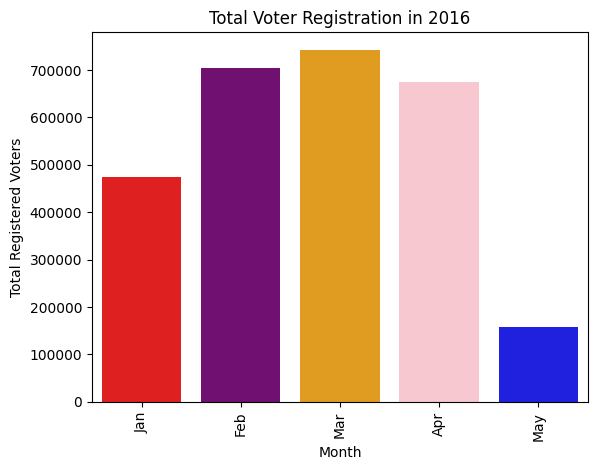

In [20]:
sns.barplot(total_2016, x="Month", y="registered_voters", hue = "Month", palette = ["pink","purple","red","orange","blue"], order=["Jan", "Feb","Mar","Apr","May"])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Total Registered Voters")
plt.title("Total Voter Registration in 2016")
plt.show()

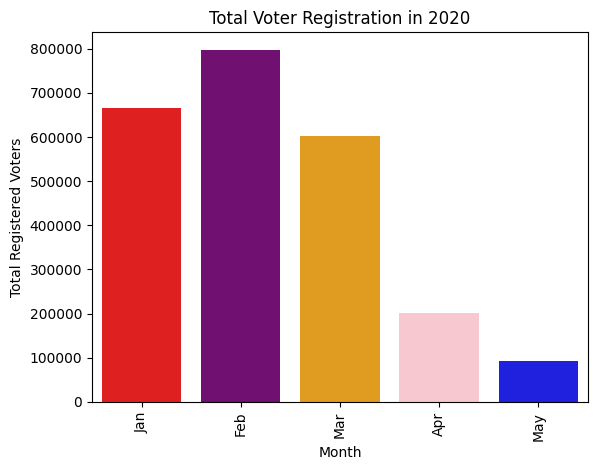

In [21]:
sns.barplot(total_2020, x="Month", y="registered_voters", hue = "Month", palette = ["pink","purple","red","orange","blue"],order=["Jan", "Feb","Mar","Apr","May"])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Total Registered Voters")
plt.title("Total Voter Registration in 2020")
plt.show()

*In the 2016 plot, total voter registration increasing during the middle months of Feb-April in 2016, and is drastically dropping off in May. However, there is significantly more voter registrations in April than 2020.In the 2020 plot, values are more left-skewed with total voter registrations peaking in Feburary and steadily dropping in March, April and May. The overall amount is less than 2016 and there are significant differences in March and April from 2016.*

**New Voter Registrations in 2020: California vs. Florida**

To answer my second research question, I created 2 more dataframes called "cali_change" and "fl_change" and combined the two dataframes by layering it above each other.

This was my question:
* How does new voter registration in Western States differ to Eastern States during the height of COVID-19 (2020) - specifically in California and Florida?

In [22]:
cali_2020 = voters.loc[(voters["Year"] == 2020) & (voters["NAME"] == 'California')]
fl_2020 = voters.loc[(voters["Year"] == 2020) & (voters["NAME"] == 'Florida')]
cali_change = cali_2020.groupby("Month")["registered_voters"].sum().reset_index()
fl_change = fl_2020.groupby("Month")["registered_voters"].sum().reset_index()

Text(0.5, 1.0, 'New Voter Registrations in California vs. Florida in 2020')

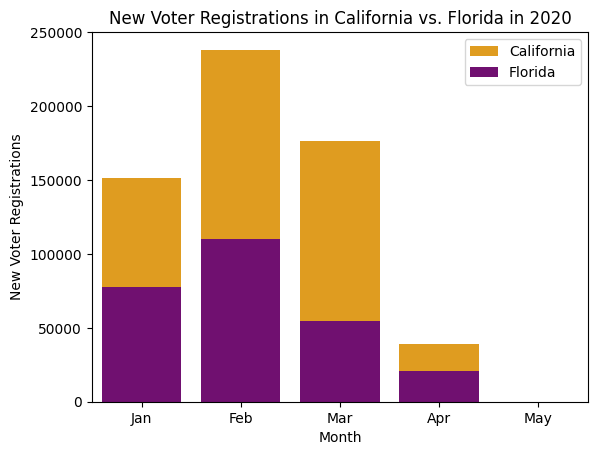

In [45]:
sns.barplot(cali_change, x="Month", y="registered_voters", color="orange", label="California", order=["Jan", "Feb","Mar","Apr","May"])
sns.barplot(fl_change, x="Month", y="registered_voters", color="purple", label="Florida", order=["Jan", "Feb","Mar","Apr","May"])
plt.xlabel("Month")
plt.ylabel("New Voter Registrations")
plt.title("New Voter Registrations in California vs. Florida in 2020")

*In this plot, there is a significant difference between new voter registrations in California in 2020, compared to Florida in 2020. It appears that California has more voter registrations than Florida. However, the shapre of the trend is the same, with new voter registrations peaking in Feburary and declining in March, April and May (non-existent).*

# Mapping

To set up our data, we will load in our shape file and set our continental US bounding box for the following analysis.

In [26]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [27]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [28]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

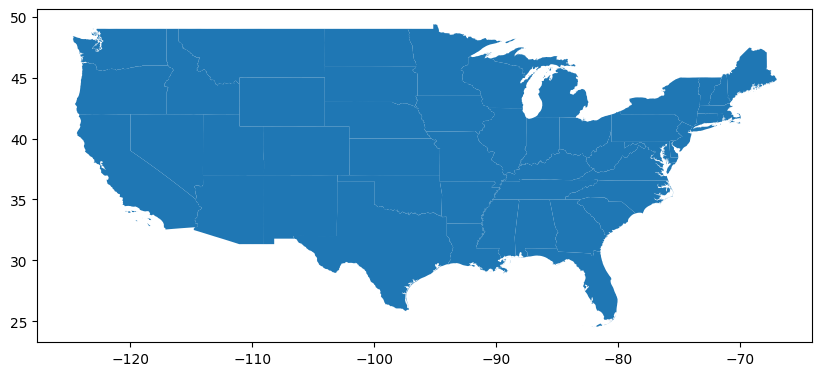

In [29]:
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.title("")
plt.show()

In [30]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

**Average Voter Registration Per State**

To visualize average voter registration graphically, I created another new dataframe called "avg_voter". Then, I merged the above dataframw ("bbox") with "avg_voter" to add value to an empty US plot. I merged it on "per_state_avg".

In [31]:
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [32]:
avg_voter = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voter = avg_voter.rename(columns={"NAME":"NAME"})

In [33]:
avg_voter.columns

Index(['NAME', 'registered_voters'], dtype='object')

In [34]:
per_state_avg = bbox.merge(avg_voter, on="NAME", how="inner")

In [35]:
per_state_avg.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125


Then, I dropped some uncessessary columns.

In [36]:
per_state_avg = per_state_avg.drop(columns=["STATEFP","STATENS","LSAD","AFFGEOID","ALAND","AWATER"])

In [ ]:
per_state_avg.head(3)

**Final Map: Average Voter Registration Per State**

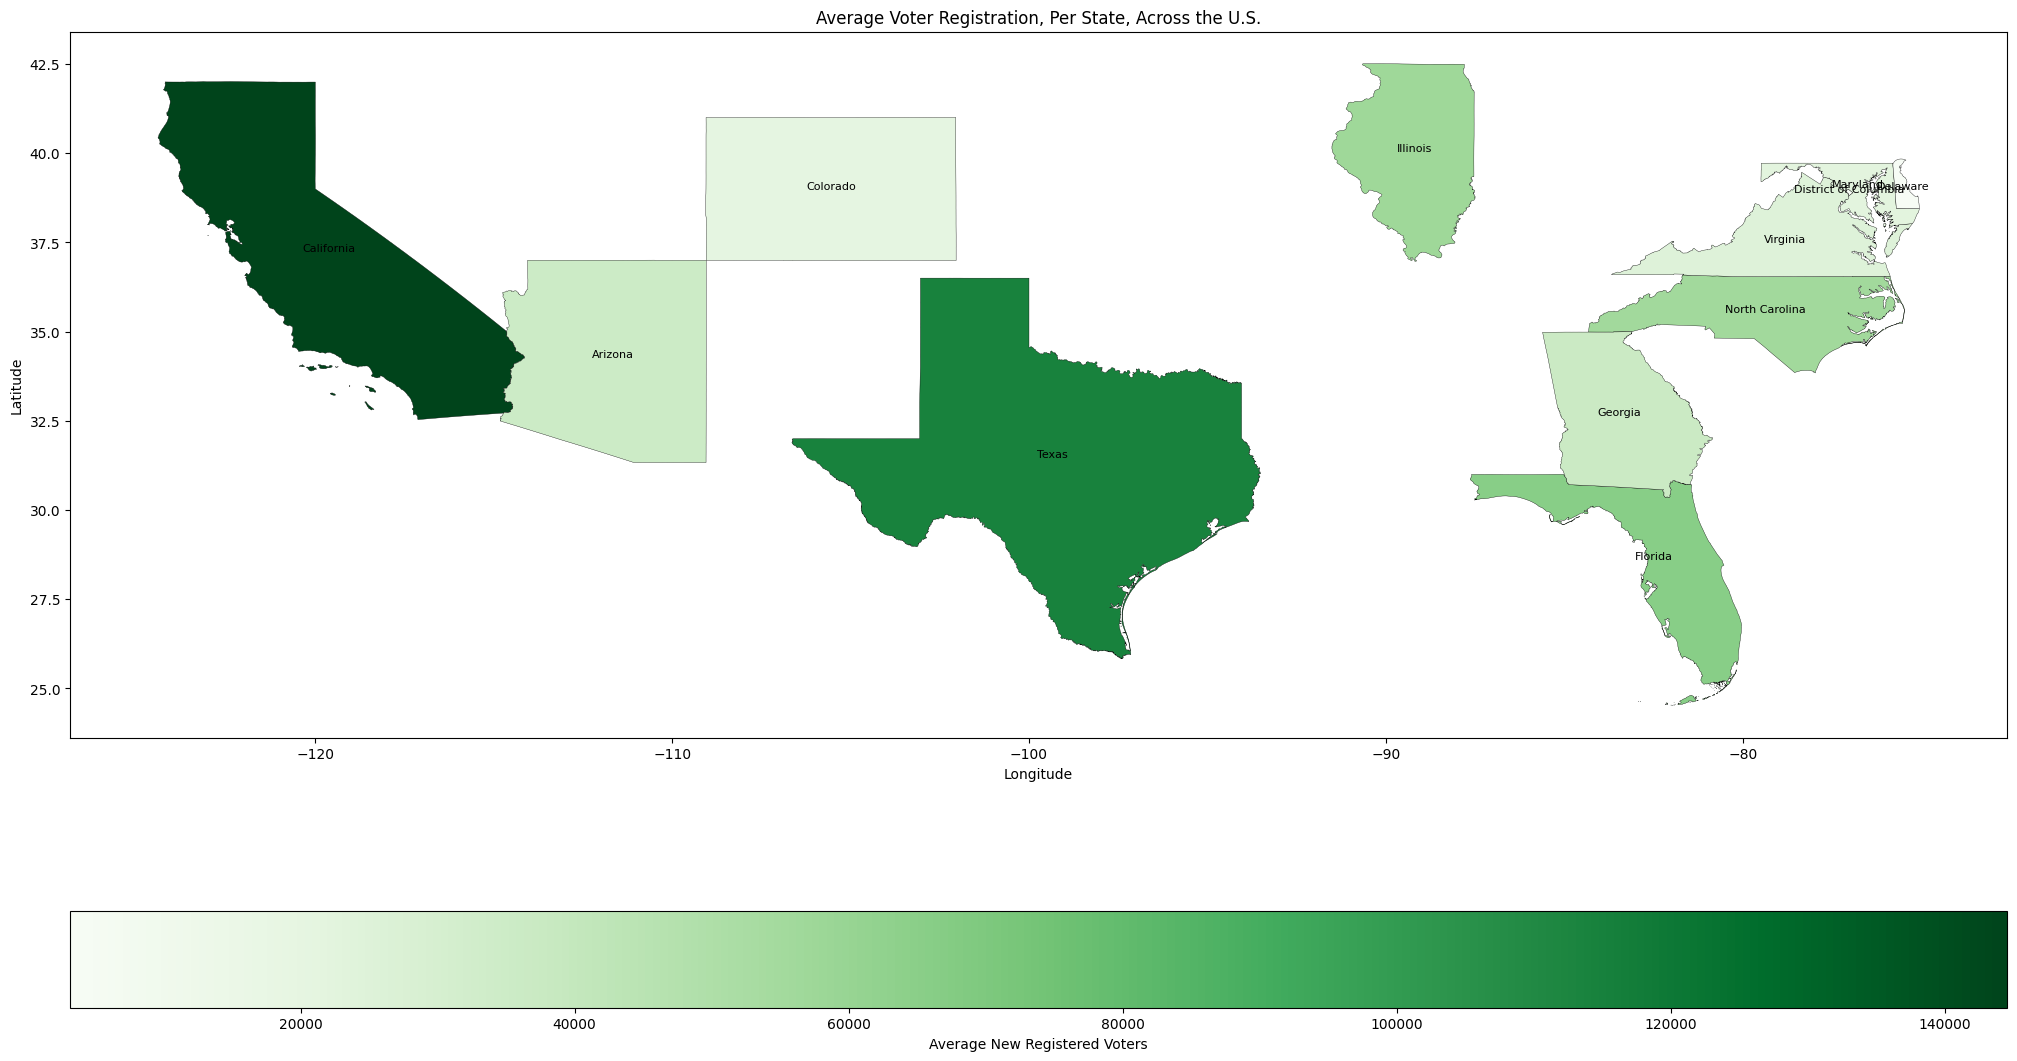

In [37]:
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot()
per_state_avg.plot(column="registered_voters",ax=ax, legend=True, cmap="Greens", linewidth=0.25, edgecolor='black',
                   legend_kwds={"label":"Average New Registered Voters", "orientation":"horizontal"})
per_state_avg.apply(lambda x: ax.annotate(
    text=x.NAME,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=8),axis=1)
plt.title("Average Voter Registration, Per State, Across the U.S.")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Conclusion

This notebook has answered both reseearch questions regarding the formation of voter registration in the United States. My first question determined the difference in new voter registration between 2016 and 2020, illustrating the time period causing the drop in registrations (Feb-March) and alluding to the influence COVID-19 had on in-person voter registratios. My second question compared West Coast and East Coast states on voter registration quantities at the peak of COVID-19, revealing that California (West) has significantly higher quantities of voter registration, but the trends of the rapidly declining rate following Feburary remained the same between both Coasts. This demonstrated that even if the states across the U.S. had different quantities, the trend of voter registrations decreasing remained the same.

To help the formation of our voter registration system better, I believe we should increase educational awareness on voting, especially in schools. The shutting of public school on voter registration created the large disconnect between pre-COVID and post-COVID. By informing the younger generation of the importance in voting, we may see the numbers climb steadily back to its previous quantities.

If I would continue to work with this project, I would gather more data on other states and their voting registration numbers, information on the impact of social media on voting, surveys on people aware of voting, and more. To summarize, I would gather more diverse and detailed data that would provide more insight on explaining why this phenomenon took place.

Again, here is the GitHub link to the offical repository of the Notebook:

[GitHub](https://github.com/jwong117-cmyk/325-Midterm.git)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
Jessica Wong